In [1]:
from Bio import pairwise2
from Bio import SeqIO
from Bio.pairwise2 import format_alignment
import re
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
#gets the transcripts and names of genes from the Mus_musculus.GRCm38.cdna.all.fa
def create_fasta_index(filename):
    transcripts = []
    gene_names = []
    fasta = SeqIO.parse(filename, "fasta")
    for record in fasta:
        gene_names.append(record.name)
        transcripts.append(record.seq)
    print(gene_names[:10])
    print(transcripts[:10])
    return (gene_names, transcripts)

In [3]:
gene_names, transcripts = create_fasta_index("Mus_musculus.GRCm38.cdna.all.fa")

['ENSMUST00000196221.1', 'ENSMUST00000179664.1', 'ENSMUST00000177564.1', 'ENSMUST00000178537.1', 'ENSMUST00000178862.1', 'ENSMUST00000179520.1', 'ENSMUST00000179883.1', 'ENSMUST00000195858.1', 'ENSMUST00000179932.1', 'ENSMUST00000180001.1']
[Seq('ATGGCATAT', SingleLetterAlphabet()), Seq('ATGGCATATCA', SingleLetterAlphabet()), Seq('ATCGGAGGGATACGAG', SingleLetterAlphabet()), Seq('GGGACAGGGGGC', SingleLetterAlphabet()), Seq('GGGACTGGGGGGGC', SingleLetterAlphabet()), Seq('CTAACTGGGAC', SingleLetterAlphabet()), Seq('AGACAGCTCAGGCTAC', SingleLetterAlphabet()), Seq('GAATACCTAC', SingleLetterAlphabet()), Seq('TGGAATACCTAC', SingleLetterAlphabet()), Seq('TCTACTATGGTAACTAC', SingleLetterAlphabet())]


In [4]:
index = gene_names.index('ENSMUST00000229660.1')
#print(index)
print(len(transcripts[index]))
index = gene_names.index('ENSMUST00000199135.1')
#print(index)
print(len(transcripts[index]))

1759
3329


In [5]:
#prints the read distributions
def print_transcript_dist(transcript_dist, gene_name):
    plt.gca().clear()
    axes = plt.gca()
    axes.set_ylim([0, max(transcript_dist) + 1])
    plt.plot(transcript_dist)
    plt.ylabel("read coverage")
    plt.xlabel("transcript location")
    plt.title(gene_name)
    plt.savefig("dropseq_dists_100/" + gene_name + ".png")

    return

In [6]:
#read in the index 
indexes = []
with open("transcript_index.txt") as f_index:
    for line in f_index:
        indexes.append(int(line[:-1]))
print(indexes[:10])

[54, 81, 83, 86, 98, 104, 121, 123, 126, 137]


In [7]:
#read in the start positions
start_positions = []
with open("transcript_start_position.txt") as f_start_position:
    for line in f_start_position:
        start_positions.append(int(line[:-1]))
print(start_positions[:10])

[52726612, 52943019, 52948890, 52972759, 53073004, 53132851, 53254047, 53259900, 53283896, 53363836]


In [8]:
#read in the transcripts
"""
gene_names = []
transcripts = []
f_transcripts = open("transcript_data.txt", "w+")
with open("Mus_musculus.GRCm38.cdna.all.fa") as f_transcript:
    cur_transcript = ""
    for line in f_transcript:
        if(line[0] == ">"):
            gene_name = line[1:]
            gene_name_arr = gene_name.split()
            gene_name = gene_name_arr[0]
            gene_names.append(gene_name)
            f_transcripts.write(gene_name)
            if(cur_transcript != ""):
                transcripts.append(cur_transcript)
                f_transcripts.write(str(len(cur_transcript)))
                cur_transcript = ""
        else:
            cur_transcript = cur_transcript + line[:-1]
print(transcripts[:10])
print(gene_names[:10])"""

'\ngene_names = []\ntranscripts = []\nf_transcripts = open("transcript_data.txt", "w+")\nwith open("Mus_musculus.GRCm38.cdna.all.fa") as f_transcript:\n    cur_transcript = ""\n    for line in f_transcript:\n        if(line[0] == ">"):\n            gene_name = line[1:]\n            gene_name_arr = gene_name.split()\n            gene_name = gene_name_arr[0]\n            gene_names.append(gene_name)\n            f_transcripts.write(gene_name)\n            if(cur_transcript != ""):\n                transcripts.append(cur_transcript)\n                f_transcripts.write(str(len(cur_transcript)))\n                cur_transcript = ""\n        else:\n            cur_transcript = cur_transcript + line[:-1]\nprint(transcripts[:10])\nprint(gene_names[:10])'

In [32]:
"""f_in = open("reads_for_transcripts.txt")
f_scores = open("dropseq_scores_100.txt", "w+")
f_str = f_in.readline()[1:-2]
reads_per_transcript = re.split('\[\[|\]\]', f_str)
counter = 0
count = 1
transcript_dist = []
for i in range(len(reads_per_transcript)):
    cur_reads = reads_per_transcript[i]
    cur_reads_arr = re.split('\]', cur_reads)
    transcript_scores = []
    
    if(not('A' in cur_reads or 'C' in cur_reads or 'G' in cur_reads or 'T' in cur_reads)):
        counter = counter + len(cur_reads_arr) - 1
        continue
    """if(len(cur_reads_arr) < 101):
        counter = counter + 1
        index = indexes[counter - 1]
        transcript_read = transcripts[index - 1]
        print(counter)
        print(index)
        print(transcript_read)
        break
        continue"""
    f_scores.write(">" + gene_names[counter] + "\n")
    for j in range(len(cur_reads_arr)):
        cur_read = cur_reads_arr[j].replace('[', '').replace(',', '').replace('\'', '').replace('\"', '')
        if(len(cur_read) > 2 and cur_read[0] == ' '):
            cur_read = cur_read[1:]
        if(len(cur_read) <= 2):
            continue
        cur_read_arr = cur_read.split(' ')
        read = cur_read_arr[0]
        init_loc = int(cur_read_arr[1])
        end_loc = int(cur_read_arr[2])
        
        index = indexes[counter]
        start_position = start_positions[counter]
        #end location is 
        transcript_read = transcripts[index][init_loc - start_position : end_loc - start_position + 1]
        if(len(transcript_dist) == 0):
            
            print(gene_names[index])
            print(counter)
            print(index)
            print(len(transcripts[index]))
            print(transcripts[index])
            
            
            for i in range(len(transcripts[index])):
                transcript_dist.append(0)
        alignments = pairwise2.align.localxx(read, transcript_read)
        if(len(alignments) > 0):
            max_a = alignments[0]
            al1, al2, max_score, begin, end = max_a
        for a in alignments:
            al1, al2, score, begin, end = a
            if(score > max_score):
                max_score = score
                max_a = a
        al1, al2, score, begin, end = max_a
        f_scores.write(str(max_score) + ", " + str(end_loc - init_loc) + ", " + str(len(read)) + "\n")
        
        transcript_scores.append(max_score) 
        transcript_dist_fragment = transcript_dist[init_loc - start_position - 1: end_loc - start_position + 1]
        transcript_dist_fragment = [x+1 for x in transcript_dist_fragment]
        transcript_dist = transcript_dist[:init_loc - start_position] + transcript_dist_fragment + transcript_dist[end_loc - start_position + 1:]
    if(counter > 2):
        break
    #if there is stuff in the dist add it
    if(len(transcript_dist) > 0):
        counter = counter + 1
        #print(gene_names[counter-1])
        if(max(transcript_dist) > 17):
            print_transcript_dist(transcript_dist, gene_names[counter - 1]) #figure out the gene portion
        del transcript_dist[:]
        transcript_dist = []
"""

ENSMUST00000103599.2
3
86
276
GGCGAGCAGGTGGAGCAGCGCCCTCCTCACCTGAGTGTCCGGGAGGGAGACAGTGCCGTTATCATCTGCACCTACACAGACCCTAACAGTTATTACTTCTTCTGGTACAAGCAAGAGCCGGGGGCAGGTCTTCAGTTGCTTATGAAGGTTTTCTCAAGTACGGAAATAAACGAAGGACAAGGATTCACTGTCCTACTGAACAAGAAAGACAAACAACTCTCTCTGAACCTCACAGCTGCCCATCCTGGGGACTCAGCCGTGTACTTCTGCGCAGTC


In [8]:
#read the reads file
f_in = open("reads_for_transcripts.txt")
f_str = f_in.readline()[1:-2]
dropseq_reads = []
cur_read = ""
i = 0
while(i < len(f_str) - 1):
    cur_char = f_str[i]
    if(cur_char == "[" and f_str[i + 1] == "]"):
        dropseq_reads.append([])
        cur_read = ""
    elif(cur_char == "]" and f_str[i+1] == "]"):
        new_cur_read_arr = []
        cur_read = cur_read.replace(" ", '').replace('\'', '')
        cur_read_arr = cur_read.split('[')
        for j in range(len(cur_read_arr)):
            cur_single_read = cur_read_arr[j].replace('],', '')
            if(len(cur_single_read) > 0 and cur_single_read[0].isalpha()):
                new_cur_read_arr.append(cur_single_read[:].split(','))
        dropseq_reads.append(new_cur_read_arr)
        cur_read = ""
    else:
        cur_read = cur_read + cur_char
    i = i + 1
print(dropseq_reads[:10])  

[[], [], [], [['TACCCCTCAAGTACGGAAAT', '52972910', '52972925'], ['AACGAAGCAAGAGCCGGGGG', '52972866', '52972882']], [], [], [], [], [['TACCCCTCAAGTACGGAAAT', '53284047', '53284062'], ['AACGAAGCAAGAGCCGGGGG', '53284003', '53284019']], [['AGACTCGTCAGCCTGTCTGG', '53363958', '53363974']]]


In [9]:
f_scores = open("dropseq_scores_100.txt", "w+")
transcript_dist = []
transcript_dists = []
scores = {}
gene_reads = {}
gene_index = {}
for i in range(len(dropseq_reads)):
    if(len(transcript_dist) > 0 and max(transcript_dist) >= 50):
        #print(transcript_dist)
        transcript_dists.append(transcript_dist[:])
        print_transcript_dist(transcript_dist, gene_name) 
    index = indexes[i]
    start_position = start_positions[i]
    dropseq_read = dropseq_reads[i]
    transcript = transcripts[index]
    gene_name = gene_names[index]
    gene_index[gene_name] = i
    f_scores.write(gene_name + "\n")
    if(not(gene_name in scores.keys())):
        scores[gene_name] = []
        gene_reads[gene_name] = []
    del transcript_dist[:]
    transcript_dist = []
    for j in range(len(transcript)):
        transcript_dist.append(0)
    if(not(len(dropseq_read) > 100)):
        continue
    for j in range(len(dropseq_read)):
        read = dropseq_read[j]
        init_loc = int(read[1])
        end_loc = int(read[2])
        init_loc = init_loc - start_position - 1
        end_loc = end_loc - start_position + 1
        if(init_loc < 0 or end_loc <= 0 or init_loc >= len(transcript) or end_loc >= len(transcript)):
        #    print(read)
        #    print('breaking')
        #    print(start_position)
        #    print(init_loc)
        #    print(end_loc)
        #    break
            continue
        for k in range(init_loc, end_loc):
            transcript_dist[k] = transcript_dist[k] + 1

        transcript_read = transcript[init_loc: end_loc]
        #print(read)
        #print(transcript_read)
        #print(init_loc)
        #print(end_loc)
        alignments = pairwise2.align.localxx(read[0], transcript_read)
        if(len(alignments) > 0):
            max_a = alignments[0]
            al1, al2, max_score, begin, end = max_a
        for a in alignments:
            al1, al2, score, begin, end = a
            if(score > max_score):
                max_score = score
                max_a = a
        al1, al2, score, begin, end = max_a
        #print(score)
        f_scores.write(str(max_score) + ", " + str(end_loc - init_loc) + ", " + str(len(read[0])) + "\n")
        scores[gene_name] = scores[gene_name] + [[int(max_score), int(end_loc - init_loc), len(read)]]
        gene_reads[gene_name] = gene_reads[gene_name] + [[read[0], str(transcript_read)]]

gene_name
gene 2


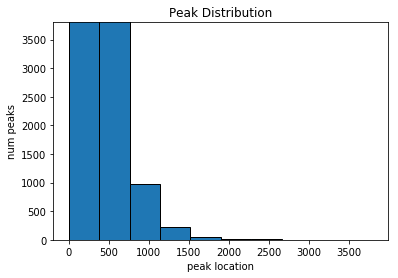

[107, 44, 107, 44, 122, 47, 107, 44, 101, 200, 196, 2, 41, 0, 99, 44, 0, 0, 0, 0, 462, 0, 0, 37, 2, 0, 0, 276, 71, 0, 181, 135, 96, 28, 345, 320, 4, 914, 635, 92, 0, 0, 159, 437, 178, 134, 0, 93, 364, 0, 60, 338, 1, 0, 0, 0, 0, 126, 218, 0, 0, 0, 51, 209, 67, 22, 0, 36, 11, 37, 0, 663, 149, 49, 156, 84, 103, 0, 0, 0, 37, 1, 1, 0, 1, 51, 0, 0, 0, 0, 1, 1, 4, 1, 11, 7, 98, 5, 2, 0, 0, 0, 33, 21, 3, 172, 206, 53, 0, 291, 75, 776, 0, 0, 0, 73, 12, 410, 203, 276, 0, 3, 238, 134, 126, 566, 741, 337, 0, 0, 200, 381, 429, 167, 327, 131, 0, 55, 302, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 0, 12, 0, 54, 93, 181, 169, 513, 145, 31, 164, 730, 29, 700, 0, 2, 0, 22, 107, 384, 196, 0, 313, 142, 27, 2, 12, 168, 28, 20, 693, 163, 70, 474, 177, 448, 106, 0, 2, 0, 37, 0, 0, 0, 0, 0, 0, 0, 0, 226, 25, 552, 0, 0, 2, 0, 151, 74, 5, 82, 3, 171, 441, 264, 45, 303, 0, 154, 8, 146, 326, 364, 8, 399, 35, 0, 0, 15, 7, 292, 0, 317, 363, 90, 255, 50, 5, 26, 205, 192, 0, 168, 166, 0, 265, 123, 34, 253, 52, 40,

In [36]:
#overall the diffs
counter = 0
diffs = []
for i in range(len(dropseq_reads)):
    dropseq_read = sorted(dropseq_reads[i], key=lambda a: a[1])
    prev_loc = start_positions[i]
    for j in range(len(dropseq_read)):        
        read = dropseq_read[j]
        init_loc = int(read[1])
        diffs.append(init_loc - prev_loc)
        prev_loc = init_loc
#print(diffs)
plt.gca().clear()
axes = plt.gca()
axes.set_ylim([0, max(diffs) + 1])
plt.hist(diffs, 10, edgecolor='black')
plt.ylabel('num peaks')
plt.xlabel('peak location')
plt.title('Peak Distribution')
plt.show()
print(diffs)

In [21]:
#if(gene_name == "ENSMUST00000199135.1" or gene_name == "ENSMUST00000229660.1"):
print(len(gene_reads["ENSMUST00000199135.1"]))
print(len(gene_reads["ENSMUST00000229660.1"]))


124
118


[23, 29, 31, 24, 26]


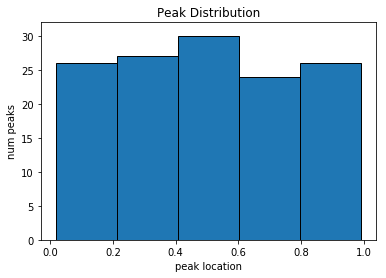

In [10]:
heights = []
bins = [0, 0, 0, 0, 0]
for i in range(len(transcript_dists)):
    if(len(transcript_dists) > 0):  
        transcript_dist = transcript_dists[i]
        height = transcript_dist.index(max(transcript_dist)) / len(transcript_dist)
        if(height < .2 and height >= 0):
            bins[0] = bins[0] + 1
        elif(height < .4 and height >= .2):
            bins[1] = bins[1] + 1
        elif(height < .6 and height >= .4):
            bins[2] = bins[2] + 1
        elif(height < .8 and height >= .6):
            bins[3] = bins[3] + 1
        else:
            bins[4] = bins[4] + 1
        heights.append(height)
print(bins) 
x = [0, .2, .4, .6, .8]
plt.gca().clear()
axes = plt.gca()
axes.set_ylim([0, max(bins) + 1])
plt.hist(heights, 5, edgecolor='black')
plt.ylabel('num peaks')
plt.xlabel('peak location')
plt.title('Peak Distribution')
plt.show()

In [11]:
#analyze the scores
#scores = {'gene_name' : [[max_score, end_loc - init_loc, len(read)], [], ...]}
reverse_complemented = []
percent_scores = {}
gene_percent_below_threshold = []
for key in scores.keys():
    transcript_scores = scores[key]
    percent_scores[key] = []
    below_threshold = []
    if(len(transcript_scores) > 100):
        #print(key)
        for i in range(len(transcript_scores)):
            percent = transcript_scores[i][0] / transcript_scores[i][1]
            percent_scores[key] = percent_scores[key] + [percent]
            if(percent < .6): # or 7
                below_threshold.append(percent)
        percent_below_threshold = len(below_threshold) / len(transcript_scores)
        if(percent_below_threshold > .5):
            #print(key)
            gene_percent_below_threshold.append(key)
        #print(percent_below_threshold)
        if(percent_below_threshold > .5):
            reads = gene_reads[key]
            reverse_complemented.append(key)
        #    for i in range(len(reads)):
        #        print('  ' + str(reads[i]))

In [12]:
import os
from shutil import copyfile
pathname = 'dropseq_dists_100'
files = os.listdir(pathname)
for file in files:
    gene_name = file[:-4]
    if(gene_name in gene_percent_below_threshold):
        copyfile(pathname + '/' + gene_name + '.png', 'dropseq_dists_100_revcov/' + gene_name + '.png')

In [13]:
for i in range(len(reverse_complemented)):
    gene_name = reverse_complemented[i]
    gene_i = gene_index[gene_name]
    index = indexes[gene_i]
    start_position = start_positions[gene_i]
    dropseq_read = dropseq_reads[gene_i]
    print(dropseq_read)
    transcript = transcripts[index]
    for j in range(len(dropseq_read)):
        read = dropseq_read[j]
        init_loc = int(read[1])
        end_loc = int(read[2])
        init_loc = init_loc - start_position - 1
        end_loc = end_loc - start_position + 1

[['TCTATTCGGCGGCCGGTGGT', '89910218', '89910231'], ['TCTATTCGGCGGCCGTGCCG', '89910218', '89910231'], ['GCGACGCATTTCTGTGGTCT', '89910229', '89910245'], ['TCTATTCGGCGGCGGGGGCT', '89910218', '89910232'], ['CCTTCAGCCCTCAGATTTTG', '89910421', '89910441'], ['TCTATTCGGCGGCCCATTCG', '89910218', '89910231'], ['TCTATTCGGCGGCGCGGAGC', '89910218', '89910232'], ['TCTATTCGGCGGCGCGGCCC', '89910218', '89910232'], ['TCTATTCGGCGGCGGCTTGG', '89910218', '89910232'], ['TCTATTCGGCGGCGCGTGGG', '89910218', '89910232'], ['TCTATTCGGCGGCGTGCTGT', '89910218', '89910232'], ['TTTCATGCCTCTGTAGTGCT', '89908875', '89908895'], ['TCTATTCGGCGGCGCGCTAC', '89910218', '89910232'], ['TCTATTCGGCGGATGGATTG', '89910218', '89910230'], ['TCTATTCGGCGGTATCGTCG', '89910218', '89910230'], ['ACTTCTATTCGGCGTGGAGT', '89910215', '89910229'], ['TCTATTCGGCGGTACGTTAC', '89910218', '89910230'], ['TCTATTCGGCGGATCGTCGC', '89910218', '89910230'], ['TCTATTCGGCGGCGTGGCAG', '89910218', '89910237'], ['TCTATTCGGCGGCGGGTCGA', '89910218', '89910232'],